In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('walmart_stock.csv', index_col='Date', parse_dates=True)
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-04,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-05,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-06,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-09,59.029999,59.549999,58.919998,59.180000,6679300,51.616215
...,...,...,...,...,...,...
2016-12-23,69.430000,69.750000,69.360001,69.540001,4803900,69.032411
2016-12-27,69.300003,69.820000,69.250000,69.699997,4435700,69.191240
2016-12-28,69.940002,70.000000,69.260002,69.309998,4875700,68.804087


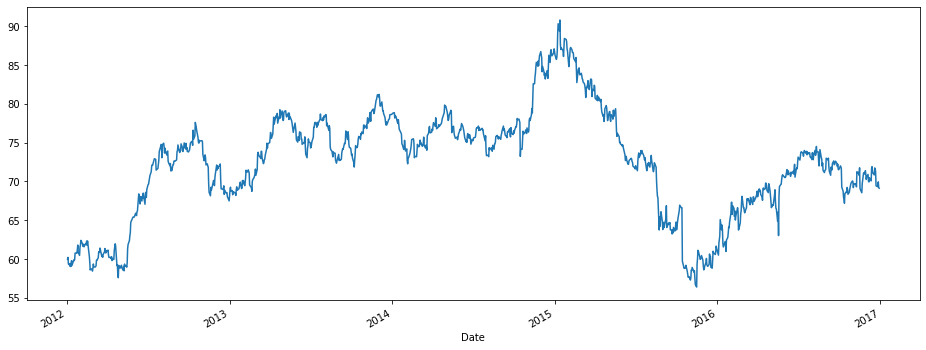

In [5]:
df['Open'].plot(figsize=(16, 6))

In [12]:
roll_mean = df.rolling(7).mean()
roll_mean 

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2016-12-23,71.027143,71.444286,70.541428,70.832857,8.427171e+06,70.315831
2016-12-27,70.752858,71.161428,70.287142,70.635714,8.041371e+06,70.120127
2016-12-28,70.591429,70.927143,70.095714,70.397142,6.188643e+06,69.883296


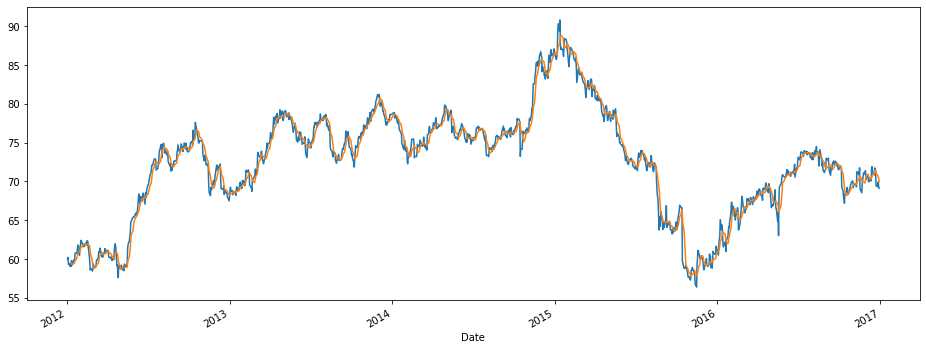

In [16]:
df['Open'].plot()
roll_mean['Open'].plot(figsize=(16, 6))

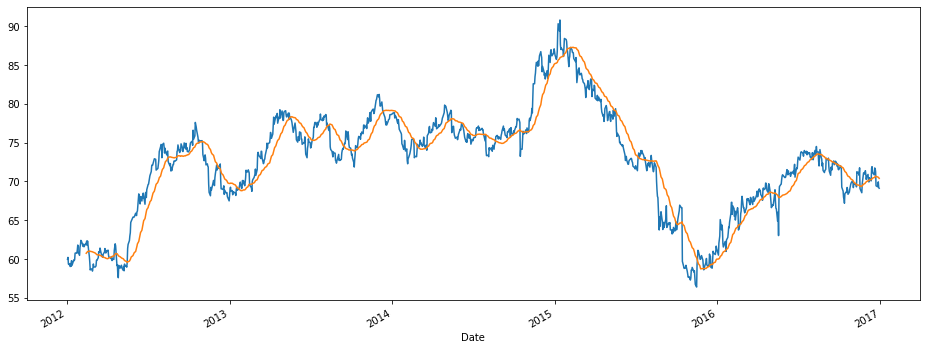

In [18]:
df['Open'].plot()
df['Open'].rolling(30).mean().plot(figsize=(16, 6))

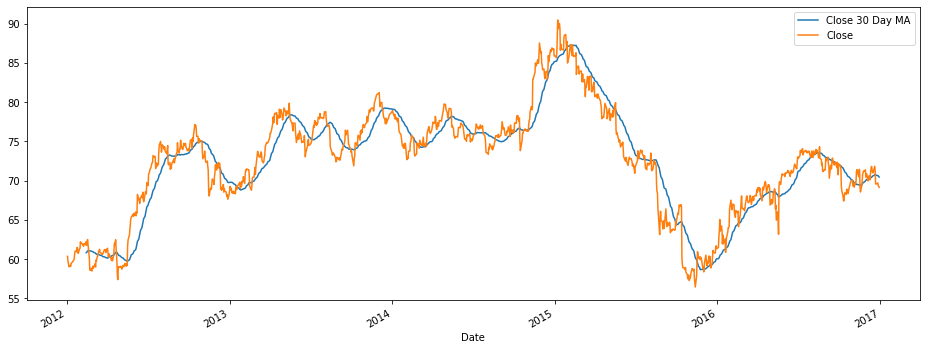

In [19]:
df['Close 30 Day MA'] = df['Close'].rolling(window=30).mean()
df[['Close 30 Day MA', 'Close']].plot(figsize=(16, 6))

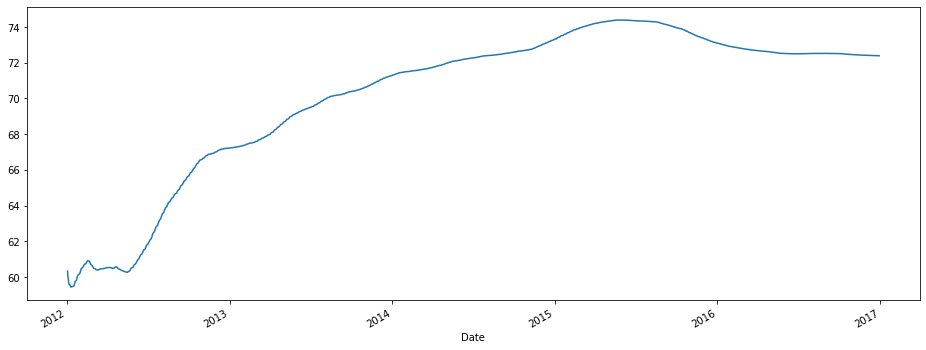

In [21]:
df['Close'].expanding().mean().plot(figsize=(16, 6))

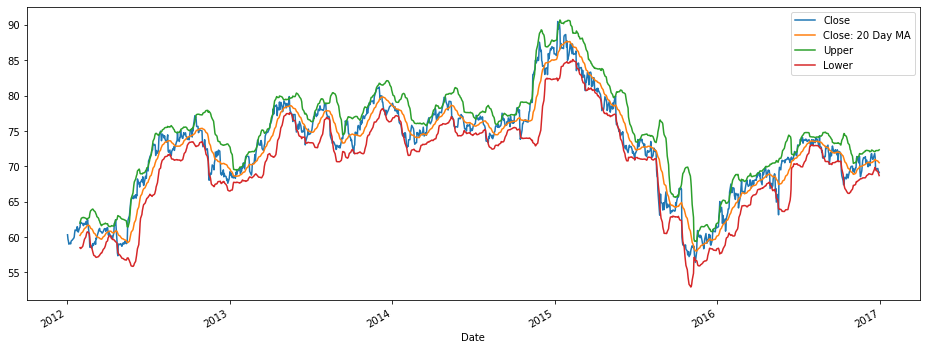

In [23]:
# Close 20 MA
df['Close: 20 Day MA'] = df['Close'].rolling(20).mean()
# Upper = 20MA + 2*std(20)
df['Upper'] = df['Close: 20 Day MA'] + 2*(df['Close'].rolling(20).std())
# Lower = 20MA - 2*std(20)
df['Lower'] = df['Close: 20 Day MA'] - 2*(df['Close'].rolling(20).std())
# Close
df[['Close', 'Close: 20 Day MA', 'Upper', 'Lower']].plot(figsize=(16, 6))

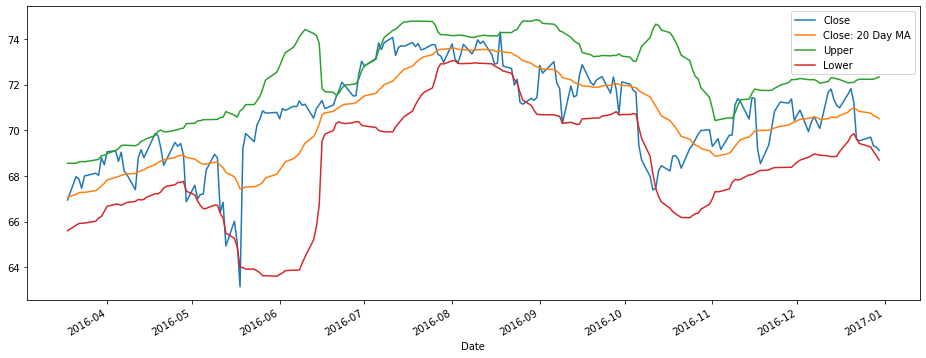

In [24]:
df[['Close', 'Close: 20 Day MA', 'Upper', 'Lower']].tail(200).plot(figsize=(16, 6))